In [2]:
import pandas as pd

# 파일 읽기
train_df = pd.read_csv('train.csv')
meta_df = pd.read_csv('meta.csv')

# 각 target별 갯수 계산
label_counts = train_df['target'].value_counts().reset_index()
label_counts.columns = ['target', 'count']

# meta 파일과 병합하여 class_name 추가
result = pd.merge(label_counts, meta_df, on='target', how='left')

# 결과 출력
print(result)

    target  count                                         class_name
0       16    100                         vehicle_registration_plate
1       10    100                               payment_confirmation
2        0    100                                     account_number
3        3    100            confirmation_of_admission_and_discharge
4       12    100                                       prescription
5        8    100                                   national_id_card
6        2    100                                      car_dashboard
7       11    100                             pharmaceutical_receipt
8        7    100                     medical_outpatient_certificate
9        9    100                                           passport
10      15    100                   vehicle_registration_certificate
11       5    100                                     driver_lisence
12       4    100                                          diagnosis
13       6    100                 

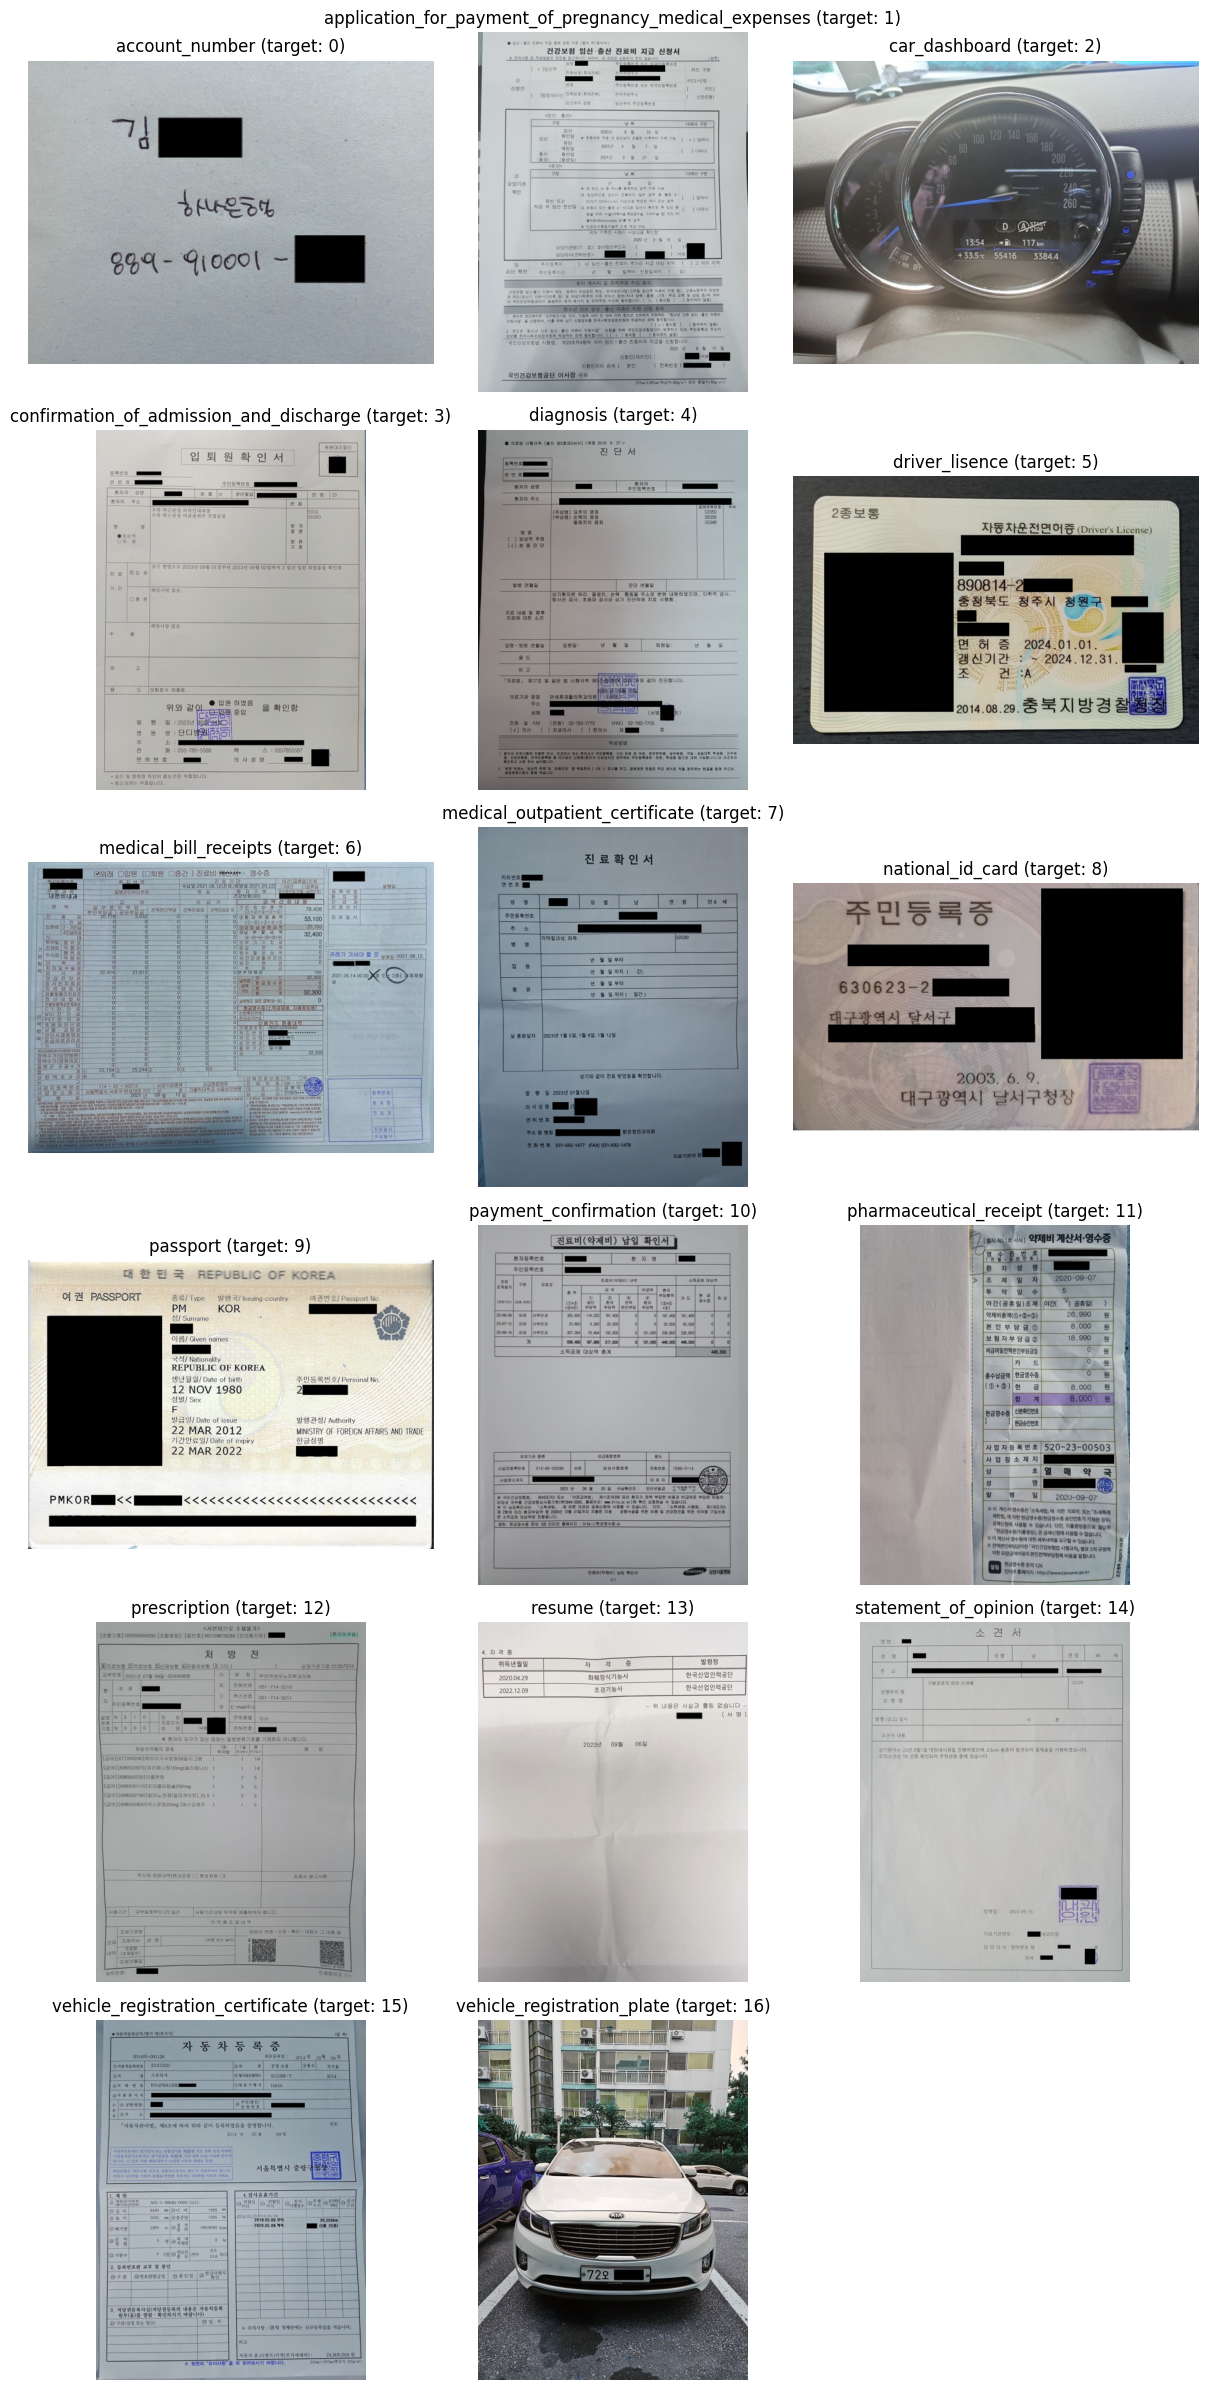

In [4]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import math

# 파일 읽기
train_df = pd.read_csv('train.csv')
meta_df = pd.read_csv('meta.csv')

# 각 클래스별 대표 이미지 선택
representative_images = train_df.groupby('target').first().reset_index()
representative_images = pd.merge(representative_images, meta_df, on='target', how='left')

# 이미지 보여주기
num_images = len(representative_images)
cols = 3  # 열 개수
rows = math.ceil(num_images / cols)  # 동적으로 행 개수 설정

plt.figure(figsize=(cols * 4, rows * 4))
for idx, row in representative_images.iterrows():
    img_path = f"./train/{row['ID']}"
    img = Image.open(img_path)
    
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(img)
    plt.title(f"{row['class_name']} (target: {row['target']})")
    plt.axis('off')

plt.tight_layout()
plt.show()

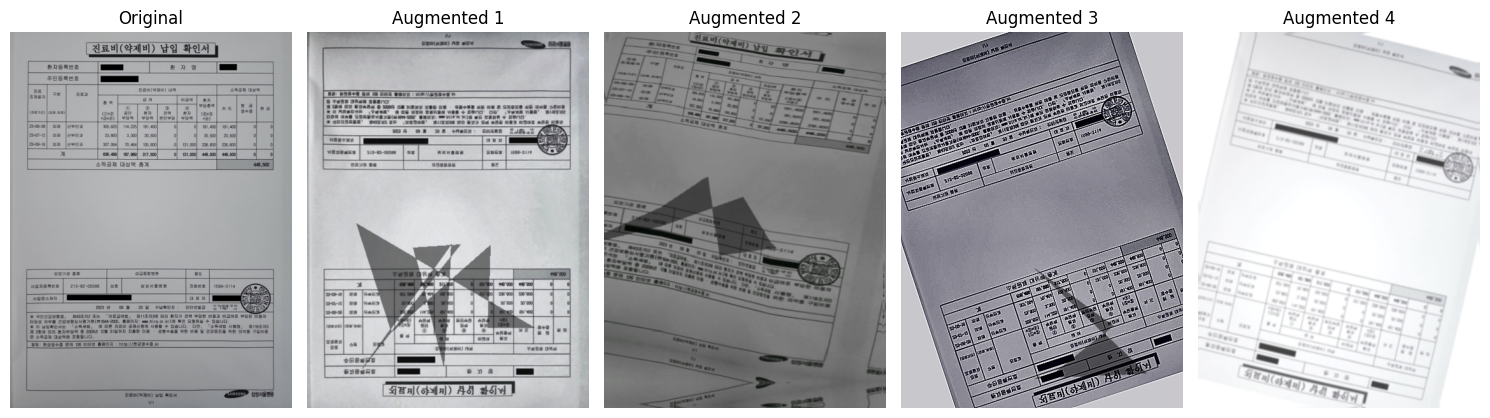

In [10]:
import pandas as pd
import albumentations as at
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

# 파일 읽기
train_df = pd.read_csv('train.csv')
meta_df = pd.read_csv('meta.csv')

# 특정 레이블 하나 선택 (예: target이 10인 경우)
selected_label = 10
sample_image_id = train_df[train_df['target'] == selected_label].iloc[0]['ID']
img_path = f"./train/{sample_image_id}"

# 이미지 로드 (PIL을 사용하여 RGB 형식으로 로드)
image = Image.open(img_path).convert("RGB")
image = np.array(image)  # albumentations와 호환 가능하도록 numpy 배열로 변환

# Albumentations 변환 파이프라인 정의 (주요 증강 기법 적용)
transform = at.Compose([
    at.HorizontalFlip(p=0.5),              # 수평 반전
    at.VerticalFlip(p=0.5),                # 수직 반전
    at.Rotate(limit=45, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.5),  # 회전 후 흰색으로 채우기
    at.RandomBrightnessContrast(p=0.5),    # 밝기/대비 조정
    at.Blur(blur_limit=5, p=0.3),          # 블러
    at.CLAHE(p=0.3),                       # CLAHE (히스토그램 평활화)
    at.ColorJitter(p=0.3),                 # 색상 조정
    at.RGBShift(p=0.3),                    # RGB 채널 이동
    at.RandomGamma(p=0.3),                 # 감마 조정
    at.HueSaturationValue(p=0.3),          # 색조/채도 조정
    at.GaussianBlur(p=0.3),                # 가우시안 블러
    at.Sharpen(p=0.3),                     # 샤프닝
    at.MotionBlur(p=0.3),                  # 모션 블러
    at.RandomShadow(p=0.3),                # 그림자 추가
    at.ElasticTransform(p=0.3),            # 탄력 변형
    at.GridDistortion(p=0.3),              # 그리드 왜곡
    at.OpticalDistortion(p=0.3),           # 광학 왜곡
    at.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=45, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.5),  # 이동, 스케일, 회전 후 흰색 채우기
])

# 이미지 증강 적용
augmented_images = [transform(image=image)['image'] for _ in range(4)]

# 원본 및 증강 이미지 시각화
plt.figure(figsize=(15, 8))
plt.subplot(1, 5, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

for i, aug_img in enumerate(augmented_images, start=2):
    plt.subplot(1, 5, i)
    plt.imshow(aug_img)
    plt.title(f"Augmented {i-1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

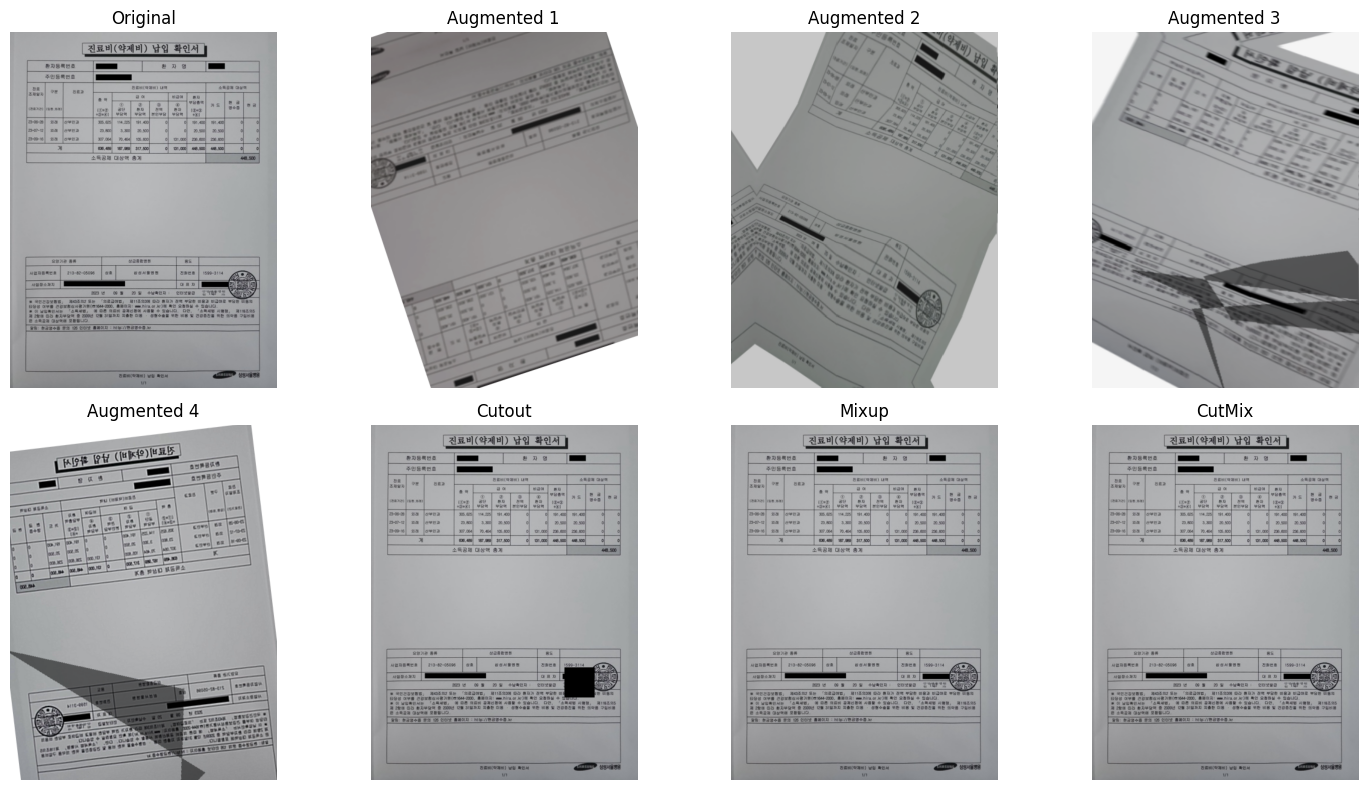

In [12]:
import pandas as pd
import albumentations as at
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
import os
import random

def load_image(train_df, label, folder_path='./train'):
    """특정 레이블의 첫 번째 이미지를 로드합니다."""
    sample_image_id = train_df[train_df['target'] == label].iloc[0]['ID']
    img_path = os.path.join(folder_path, sample_image_id)
    
    # 이미지 로드 (PIL을 사용하여 RGB 형식으로 로드)
    image = Image.open(img_path).convert("RGB")
    return np.array(image)  # albumentations와 호환 가능하도록 numpy 배열로 변환

def apply_augmentation(image):
    """albumentations를 사용하여 다양한 증강 기법을 적용합니다."""
    transform = at.Compose([
        at.HorizontalFlip(p=0.5),
        at.VerticalFlip(p=0.5),
        at.Rotate(limit=45, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.5),
        at.RandomBrightnessContrast(p=0.5),
        at.Blur(blur_limit=5, p=0.3),
        at.CLAHE(p=0.3),
        at.ColorJitter(p=0.3),
        at.RGBShift(p=0.3),
        at.RandomGamma(p=0.3),
        at.HueSaturationValue(p=0.3),
        at.GaussianBlur(p=0.3),
        at.Sharpen(p=0.3),
        at.MotionBlur(p=0.3),
        at.RandomShadow(p=0.3),
        at.ElasticTransform(p=0.3),
        at.GridDistortion(p=0.3),
        at.OpticalDistortion(p=0.3),
        at.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=45, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.5),
    ])
    augmented_images = [transform(image=image)['image'] for _ in range(4)]
    return augmented_images

def apply_cutout(image, num_holes=1, hole_size=(50, 50)):
    """Cutout 기법을 적용하여 일부 영역을 검정색으로 채웁니다."""
    h, w, _ = image.shape
    new_image = image.copy()
    for _ in range(num_holes):
        y = random.randint(0, h - hole_size[0])
        x = random.randint(0, w - hole_size[1])
        new_image[y:y + hole_size[0], x:x + hole_size[1], :] = 0
    return new_image

def apply_mixup(image1, image2, alpha=0.4):
    """Mixup 기법을 적용하여 두 이미지를 혼합합니다."""
    lam = np.random.beta(alpha, alpha)
    mixed_image = lam * image1 + (1 - lam) * image2
    return mixed_image.astype(np.uint8), lam

def apply_cutmix(image1, image2, beta=1.0):
    """CutMix 기법을 적용하여 한 이미지의 일부를 다른 이미지로 대체합니다."""
    lam = np.random.beta(beta, beta)
    h, w, _ = image1.shape
    cut_rat = np.sqrt(1. - lam)
    cut_w = int(w * cut_rat)  # np.int 대신 int로 수정
    cut_h = int(h * cut_rat)  # np.int 대신 int로 수정
    cx = np.random.randint(w)
    cy = np.random.randint(h)
    bbx1 = np.clip(cx - cut_w // 2, 0, w)
    bby1 = np.clip(cy - cut_h // 2, 0, h)
    bbx2 = np.clip(cx + cut_w // 2, 0, w)
    bby2 = np.clip(cy + cut_h // 2, 0, h)
    new_image = image1.copy()
    new_image[bby1:bby2, bbx1:bbx2] = image2[bby1:bby2, bbx1:bbx2]
    return new_image, lam

def show_images(original_image, augmented_images, cutout_image, mixup_image, cutmix_image):
    """원본 및 증강된 이미지를 시각화합니다."""
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 4, 1)
    plt.imshow(original_image)
    plt.title("Original")
    plt.axis('off')
    
    for i, aug_img in enumerate(augmented_images, start=2):
        plt.subplot(2, 4, i)
        plt.imshow(aug_img)
        plt.title(f"Augmented {i-1}")
        plt.axis('off')
    
    plt.subplot(2, 4, 6)
    plt.imshow(cutout_image)
    plt.title("Cutout")
    plt.axis('off')
    
    plt.subplot(2, 4, 7)
    plt.imshow(mixup_image)
    plt.title("Mixup")
    plt.axis('off')
    
    plt.subplot(2, 4, 8)
    plt.imshow(cutmix_image)
    plt.title("CutMix")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# 파일 읽기
train_df = pd.read_csv('train.csv')
meta_df = pd.read_csv('meta.csv')

# 특정 레이블 선택 및 이미지 로드
selected_label = 10
original_image = load_image(train_df, selected_label)

# 증강 적용
augmented_images = apply_augmentation(original_image)
cutout_image = apply_cutout(original_image)

# Mixup과 CutMix를 위한 두 번째 이미지 로드
image2 = load_image(train_df, selected_label)  # 여기서는 같은 레이블로 로드, 필요 시 다른 레이블로 변경 가능
mixup_image, _ = apply_mixup(original_image, image2)
cutmix_image, _ = apply_cutmix(original_image, image2)

# 원본 및 증강 이미지 시각화
show_images(original_image, augmented_images, cutout_image, mixup_image, cutmix_image)

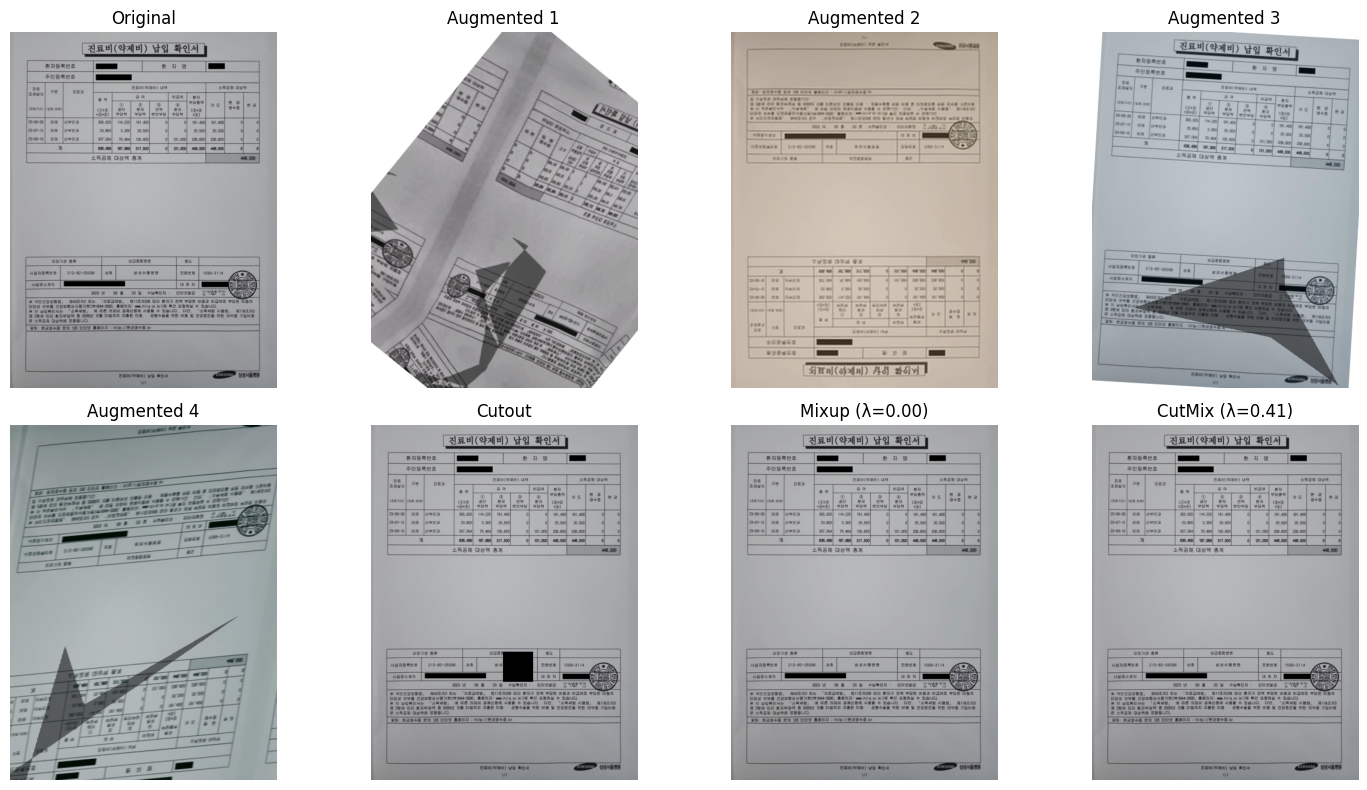

In [13]:
import pandas as pd
import albumentations as at
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
import os
import random

def load_image(train_df, label, folder_path='./train'):
    """특정 레이블의 첫 번째 이미지를 로드합니다."""
    sample_image_id = train_df[train_df['target'] == label].iloc[0]['ID']
    img_path = os.path.join(folder_path, sample_image_id)
    
    # 이미지 로드 (PIL을 사용하여 RGB 형식으로 로드)
    image = Image.open(img_path).convert("RGB")
    return np.array(image)  # albumentations와 호환 가능하도록 numpy 배열로 변환

def apply_augmentation(image):
    """albumentations를 사용하여 다양한 증강 기법을 적용합니다."""
    transform = at.Compose([
        at.HorizontalFlip(p=0.5),
        at.VerticalFlip(p=0.5),
        at.Rotate(limit=45, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.5),
        at.RandomBrightnessContrast(p=0.5),
        at.Blur(blur_limit=5, p=0.3),
        at.CLAHE(p=0.3),
        at.ColorJitter(p=0.3),
        at.RGBShift(p=0.3),
        at.RandomGamma(p=0.3),
        at.HueSaturationValue(p=0.3),
        at.GaussianBlur(p=0.3),
        at.Sharpen(p=0.3),
        at.MotionBlur(p=0.3),
        at.RandomShadow(p=0.3),
        at.ElasticTransform(p=0.3),
        at.GridDistortion(p=0.3),
        at.OpticalDistortion(p=0.3),
        at.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=45, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.5),
    ])
    augmented_images = [transform(image=image)['image'] for _ in range(4)]
    return augmented_images

def apply_cutout(image, num_holes=1, hole_size=(50, 50)):
    """Cutout 기법을 적용하여 일부 영역을 검정색으로 채웁니다."""
    h, w, _ = image.shape
    new_image = image.copy()
    for _ in range(num_holes):
        y = random.randint(0, h - hole_size[0])
        x = random.randint(0, w - hole_size[1])
        new_image[y:y + hole_size[0], x:x + hole_size[1], :] = 0
    return new_image

def apply_mixup(image1, image2, alpha=0.4):
    """Mixup 기법을 적용하여 두 이미지를 혼합합니다."""
    lam = np.random.beta(alpha, alpha)
    mixed_image = lam * image1 + (1 - lam) * image2
    return mixed_image.astype(np.uint8), lam

def apply_cutmix(image1, image2, beta=1.0):
    """CutMix 기법을 적용하여 한 이미지의 일부를 다른 이미지로 대체합니다."""
    lam = np.random.beta(beta, beta)
    h, w, _ = image1.shape
    cut_rat = np.sqrt(1. - lam)
    cut_w = int(w * cut_rat)
    cut_h = int(h * cut_rat)
    cx = np.random.randint(w)
    cy = np.random.randint(h)
    bbx1 = np.clip(cx - cut_w // 2, 0, w)
    bby1 = np.clip(cy - cut_h // 2, 0, h)
    bbx2 = np.clip(cx + cut_w // 2, 0, w)
    bby2 = np.clip(cy + cut_h // 2, 0, h)
    new_image = image1.copy()
    new_image[bby1:bby2, bbx1:bbx2] = image2[bby1:bby2, bbx1:bbx2]
    return new_image, lam

def show_images(original_image, augmented_images, cutout_image, mixup_image, mixup_lam, cutmix_image, cutmix_lam):
    """원본 및 증강된 이미지를 시각화합니다."""
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 4, 1)
    plt.imshow(original_image)
    plt.title("Original")
    plt.axis('off')
    
    for i, aug_img in enumerate(augmented_images, start=2):
        plt.subplot(2, 4, i)
        plt.imshow(aug_img)
        plt.title(f"Augmented {i-1}")
        plt.axis('off')
    
    plt.subplot(2, 4, 6)
    plt.imshow(cutout_image)
    plt.title("Cutout")
    plt.axis('off')
    
    plt.subplot(2, 4, 7)
    plt.imshow(mixup_image)
    plt.title(f"Mixup (λ={mixup_lam:.2f})")
    plt.axis('off')
    
    plt.subplot(2, 4, 8)
    plt.imshow(cutmix_image)
    plt.title(f"CutMix (λ={cutmix_lam:.2f})")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# 파일 읽기
train_df = pd.read_csv('train.csv')
meta_df = pd.read_csv('meta.csv')

# 특정 레이블 선택 및 이미지 로드
selected_label = 10
original_image = load_image(train_df, selected_label)

# 증강 적용
augmented_images = apply_augmentation(original_image)
cutout_image = apply_cutout(original_image)

# Mixup과 CutMix를 위한 두 번째 이미지 로드
image2 = load_image(train_df, selected_label)  # 여기서는 같은 레이블로 로드, 필요 시 다른 레이블로 변경 가능
mixup_image, mixup_lam = apply_mixup(original_image, image2)
cutmix_image, cutmix_lam = apply_cutmix(original_image, image2)

# 원본 및 증강 이미지 시각화
show_images(original_image, augmented_images, cutout_image, mixup_image, mixup_lam, cutmix_image, cutmix_lam)

In [20]:
import pandas as pd
import albumentations as at
import numpy as np
import cv2
import os
import random
from PIL import Image

# 증강된 이미지를 저장할 디렉토리 및 CSV 파일 경로 설정
output_dir = './train_oversampling'
output_csv = './train_oversampling.csv'
os.makedirs(output_dir, exist_ok=True)

# 파일 읽기
train_df = pd.read_csv('train.csv')

# train_oversampling.csv 파일 초기화
with open(output_csv, 'w') as f:
    f.write('ID,target\n')  # CSV 파일의 헤더 작성

def load_image(img_path, target_size=(512, 512)):
    """이미지를 로드하고 target_size로 조정한 후 numpy 배열로 변환합니다."""
    image = Image.open(img_path).convert("RGB")
    image = image.resize(target_size)
    return np.array(image)

def apply_augmentation(image, n=1):
    """일정한 범위 내에서 albumentations 증강 기법을 적용하여 n개의 이미지를 생성합니다."""
    transform = at.Compose([
        at.HorizontalFlip(p=0.5),  # 50% 확률로 수평 반전
        at.VerticalFlip(p=0.2),  # 20% 확률로 수직 반전
        at.Rotate(limit=(0, 45), border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.8),  # 0도에서 45도 사이 회전
        at.RandomBrightnessContrast(brightness_limit=(0.0, 0.2), contrast_limit=(0.0, 0.2), p=0.8),  # 밝기와 대비 조정 범위 축소
        at.Blur(blur_limit=3, p=0.3),  # 블러 강도를 홀수로 수정
        at.CLAHE(clip_limit=2, p=0.5),  # 히스토그램 평활화 강도 줄이기
        at.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05, p=0.7),  # 색상 조정 범위 축소
        at.RGBShift(r_shift_limit=5, g_shift_limit=5, b_shift_limit=5, p=0.3),  # RGB 채널 이동 제한
        at.RandomGamma(gamma_limit=(90, 110), p=0.8),  # 감마 조정 줄이기
        at.HueSaturationValue(hue_shift_limit=3, sat_shift_limit=10, val_shift_limit=8, p=0.4),  # 색조/채도/밝기 조정 줄이기
        at.GaussianBlur(blur_limit=3, p=0.5),  # 가우시안 블러 강도를 홀수로 수정
        at.Sharpen(alpha=(0.05, 0.2), p=0.4),  # 샤프닝 줄이기
        at.MotionBlur(blur_limit=3, p=0.2),  # 모션 블러 강도를 홀수로 수정
        at.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_lower=1, num_shadows_upper=2, shadow_dimension=5, p=0.2),  # 그림자 줄이기
        at.ElasticTransform(alpha=0.5, sigma=30, alpha_affine=30, p=0.3),  # 탄력 변형 줄이기
        at.GridDistortion(num_steps=4, distort_limit=0.2, p=0.3),  # 그리드 왜곡 줄이기
        at.OpticalDistortion(distort_limit=0.03, shift_limit=0.03, p=0.3),  # 광학 왜곡 줄이기
        at.ShiftScaleRotate(shift_limit=0.03, scale_limit=0.1, rotate_limit=15, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.5),  # 이동, 스케일, 회전 줄이기
    ])
    return [transform(image=image)['image'] for _ in range(n)]

def save_augmented_image(image, filename):
    """증강된 이미지를 파일로 저장합니다."""
    Image.fromarray(image).save(filename)

# 각 타겟별 샘플 수 계산
target_counts = train_df['target'].value_counts()
print("Original target counts:\n", target_counts)

# 타겟별 데이터 수를 100으로 맞추기 위한 루프
for label, count in target_counts.items():
    img_paths = train_df[train_df['target'] == label]['ID']
    
    # 현재 샘플 수가 100보다 작다면 증강으로 추가 생성
    if count < 100:
        additional_images_needed = 100 - count
        images_to_augment = []
        
        # 각 이미지를 로드하고 증강 수행
        for img_id in img_paths:
            img_path = f"./train/{img_id}"
            image = load_image(img_path)
            images_to_augment.append(image)
        
        # 증강 및 저장
        idx = 0
        while additional_images_needed > 0:
            for image in images_to_augment:
                aug_images = apply_augmentation(image, n=min(additional_images_needed, 5))
                for aug_img in aug_images:
                    aug_filename = f"{img_id.replace('.jpg', '')}_over_{idx}.jpg"  # 기존 파일명에서 확장자 제거
                    save_augmented_image(aug_img, os.path.join(output_dir, aug_filename))
                    with open(output_csv, 'a') as f:
                        f.write(f"{aug_filename},{label}\n")
                    additional_images_needed -= 1
                    idx += 1
                    if additional_images_needed <= 0:
                        break

print("모든 클래스의 데이터가 100장으로 증강되었으며, 결과는 train_oversampling.csv 파일에 기록되었습니다.")

Original target counts:
 target
16    100
10    100
0     100
3     100
12    100
8     100
2     100
11    100
7     100
9     100
15    100
5     100
4     100
6     100
13     74
14     50
1      46
Name: count, dtype: int64


/data/ephemeral/home/tf/lib/python3.10/site-packages/pydantic/main.py:390: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue: Expected `float` but got `list` with value `[0.9, 1.1]` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue: Expected `tuple[float, float]` but got `list` with value `[0.9, 1.1]` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue: Expected `float` but got `list` with value `[0.9, 1.1]` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue: Expected `tuple[float, float]` but got `list` with value `[0.9, 1.1]` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue: Expected `float` but got `list` with value `[0.9, 1.1]` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue: Expected `tuple[float, float]` but got `list` with value `[0.9, 1.1]` - serialized value may not be as expected
  PydanticSe

모든 클래스의 데이터가 100장으로 증강되었으며, 결과는 train_oversampling.csv 파일에 기록되었습니다.


In [21]:
import pandas as pd

# 파일 읽기
train_df = pd.read_csv('train_total.csv')
meta_df = pd.read_csv('meta.csv')

# 각 target별 갯수 계산
label_counts = train_df['target'].value_counts().reset_index()
label_counts.columns = ['target', 'count']

# meta 파일과 병합하여 class_name 추가
result = pd.merge(label_counts, meta_df, on='target', how='left')

# 결과 출력
print(result)

    target  count                                         class_name
0       16    100                         vehicle_registration_plate
1       11    100                             pharmaceutical_receipt
2        1    100  application_for_payment_of_pregnancy_medical_e...
3        0    100                                     account_number
4        3    100            confirmation_of_admission_and_discharge
5       12    100                                       prescription
6        8    100                                   national_id_card
7        2    100                                      car_dashboard
8        7    100                     medical_outpatient_certificate
9       10    100                               payment_confirmation
10      13    100                                             resume
11       9    100                                           passport
12      14    100                               statement_of_opinion
13      15    100                 

In [26]:
import pandas as pd
import albumentations as at
import numpy as np
import cv2
import os
import random
from PIL import Image

# 증강된 이미지를 저장할 디렉토리 및 CSV 파일 경로 설정
output_dir = './train_aug'
output_csv = './train_aug.csv'
os.makedirs(output_dir, exist_ok=True)

# 파일 읽기
train_df = pd.read_csv('train_total.csv')

# train_aug.csv 파일 초기화
with open(output_csv, 'w') as f:
    f.write('ID,target\n')  # CSV 파일의 헤더 작성

def load_image(img_path, target_size=(512, 512)):
    """이미지를 로드하고 target_size로 조정한 후 numpy 배열로 변환합니다."""
    image = Image.open(img_path).convert("RGB")
    image = image.resize(target_size)
    return np.array(image)

def apply_augmentation(image):
    """albumentations를 사용하여 다양한 증강 기법을 적용합니다."""
    transform = at.Compose([
        at.HorizontalFlip(p=0.5),
        at.VerticalFlip(p=0.2),
        at.RandomBrightnessContrast(brightness_limit=(0.0, 0.2), contrast_limit=(0.0, 0.2), p=0.7),
        at.Blur(blur_limit=3, p=0.3),
        at.CLAHE(clip_limit=2, p=0.4),
        at.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05, p=0.5),
        at.RGBShift(r_shift_limit=5, g_shift_limit=5, b_shift_limit=5, p=0.3),
        at.RandomGamma(gamma_limit=(90, 110), p=0.5),
        at.HueSaturationValue(hue_shift_limit=3, sat_shift_limit=10, val_shift_limit=8, p=0.4),
        at.GaussianBlur(blur_limit=3, p=0.3),
        at.Sharpen(alpha=(0.05, 0.2), p=0.5),
        at.MotionBlur(blur_limit=3, p=0.3),
        at.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_lower=1, num_shadows_upper=2, shadow_dimension=5, p=0.3),
        at.ElasticTransform(alpha=0.5, sigma=30, alpha_affine=30, p=0.3),
        at.GridDistortion(num_steps=4, distort_limit=0.2, p=0.4),
        at.OpticalDistortion(distort_limit=0.03, shift_limit=0.03, p=0.4),
        at.ShiftScaleRotate(shift_limit=0.03, scale_limit=0.1, rotate_limit=15, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.5)
    ])
    return transform(image=image)['image']

def apply_rotation(image, angle):
    """특정 각도로 이미지를 회전시킵니다."""
    transform = at.Rotate(limit=(angle, angle), border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=1.0)
    rotated_image = transform(image=image)['image']
    return rotated_image

def apply_cutout(image, n=5, num_holes=1, hole_size=(50, 50)):
    """Cutout 기법을 적용하여 원본 이미지가 많이 유지되는 증강을 생성합니다."""
    h, w, _ = image.shape
    augmented_images = []
    for _ in range(n):
        new_image = image.copy()
        for _ in range(num_holes):
            y = random.randint(0, h - hole_size[0])
            x = random.randint(0, w - hole_size[1])
            new_image[y:y + hole_size[0], x:x + hole_size[1], :] = 0  # 원본 비율을 높이기 위해 작은 영역만 자름
        augmented_images.append(new_image)
    return augmented_images

def apply_mixup(image1, image2, n=5, alpha=0.7):
    """Mixup 기법을 적용하여 원본 이미지 비율이 더 높도록 설정합니다."""
    augmented_images = []
    for _ in range(n):
        lam = np.random.beta(alpha, alpha)
        if lam < 0.5:  # 원본 이미지 비율을 높이기 위해 최소 0.5 이상으로 유지
            lam = 0.5
        mixed_image = lam * image1 + (1 - lam) * image2
        augmented_images.append(mixed_image.astype(np.uint8))
    return augmented_images

def apply_cutmix(image1, image2, n=5, beta=1.0):
    """CutMix 기법을 적용하여 원본 이미지 비율이 더 높도록 설정합니다."""
    h, w, _ = image1.shape
    augmented_images = []
    for _ in range(n):
        lam = np.random.beta(beta, beta)
        if lam < 0.5:  # 원본 이미지 비율을 높이기 위해 최소 0.5 이상으로 유지
            lam = 0.5
        cut_rat = np.sqrt(1. - lam)
        cut_w = int(w * cut_rat)
        cut_h = int(h * cut_rat)
        cx = np.random.randint(w)
        cy = np.random.randint(h)
        bbx1 = np.clip(cx - cut_w // 2, 0, w)
        bby1 = np.clip(cy - cut_h // 2, 0, h)
        bbx2 = np.clip(cx + cut_w // 2, 0, w)
        bby2 = np.clip(cy + cut_h // 2, 0, h)
        new_image = image1.copy()
        new_image[bby1:bby2, bbx1:bbx2] = image2[bby1:bby2, bbx1:bbx2]
        augmented_images.append(new_image)
    return augmented_images

def save_augmented_image(image, filename):
    """증강된 이미지를 파일로 저장합니다."""
    Image.fromarray(image).save(filename)

# 모든 이미지에 대해 증강 수행
for idx, row in train_df.iterrows():
    img_id = row['ID']
    label = row['target']
    img_path = f"./train_total/{img_id}"
    image = load_image(img_path)

    # 원본 이미지 저장 및 CSV에 기록
    original_filename = f"{img_id.replace('.jpg', '')}_aug.jpg"
    save_augmented_image(image, os.path.join(output_dir, original_filename))
    with open(output_csv, 'a') as f:
        f.write(f"{original_filename},{label}\n")

    # 1. 원본 이미지에 대해 `apply_augmentation` 적용 후 회전 반복 수행
    rotations = np.linspace(0, 360, 20, endpoint=False)
    for idx, angle in enumerate(rotations):
        augmented_image = apply_augmentation(image)  # 원본 이미지에 대해 증강 수행
        rotated_image = apply_rotation(augmented_image, angle)  # 회전 적용
        
        # 파일명에 각도를 포함해 저장
        rot_filename = f"{img_id.replace('.jpg', '')}_rot_{int(angle)}_aug_{idx}.jpg"
        save_augmented_image(rotated_image, os.path.join(output_dir, rot_filename))
        with open(output_csv, 'a') as f:
            f.write(f"{rot_filename},{label}\n")

    # 2. Cutout 5개 생성 및 저장
    cutout_images = apply_cutout(image, n=5)
    for idx, cut_img in enumerate(cutout_images):
        cut_filename = f"{img_id.replace('.jpg', '')}_cutout_aug_{idx}.jpg"
        save_augmented_image(cut_img, os.path.join(output_dir, cut_filename))
        with open(output_csv, 'a') as f:
            f.write(f"{cut_filename},{label}\n")

    # 3. Mixup 5개 생성 및 저장
    if len(train_df) > 1:
        next_img_id = random.choice(train_df['ID'])
        if next_img_id != img_id:
            next_img_path = f"./train_total/{next_img_id}"
            next_image = load_image(next_img_path)
            mixup_images = apply_mixup(image, next_image, n=5)
            for idx, mix_img in enumerate(mixup_images):
                mix_filename = f"{img_id.replace('.jpg', '')}_mixup_aug_{idx}.jpg"
                save_augmented_image(mix_img, os.path.join(output_dir, mix_filename))
                with open(output_csv, 'a') as f:
                    f.write(f"{mix_filename},{label}\n")

    # 4. CutMix 5개 생성 및 저장
    if len(train_df) > 1:
        next_img_id = random.choice(train_df['ID'])
        if next_img_id != img_id:
            next_img_path = f"./train_total/{next_img_id}"
            next_image = load_image(next_img_path)
            cutmix_images = apply_cutmix(image, next_image, n=5)
            for idx, cutmix_img in enumerate(cutmix_images):
                cutmix_filename = f"{img_id.replace('.jpg', '')}_cutmix_aug_{idx}.jpg"
                save_augmented_image(cutmix_img, os.path.join(output_dir, cutmix_filename))
                with open(output_csv, 'a') as f:
                    f.write(f"{cutmix_filename},{label}\n")

print("모든 이미지에 대해 augmentation, 회전, Cutout, Mixup, CutMix 증강이 완료되었으며 결과는 train_aug.csv 파일에 기록되었습니다.")

/data/ephemeral/home/tf/lib/python3.10/site-packages/pydantic/main.py:390: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue: Expected `float` but got `list` with value `[0.9, 1.1]` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue: Expected `tuple[float, float]` but got `list` with value `[0.9, 1.1]` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue: Expected `float` but got `list` with value `[0.9, 1.1]` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue: Expected `tuple[float, float]` but got `list` with value `[0.9, 1.1]` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue: Expected `float` but got `list` with value `[0.9, 1.1]` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue: Expected `tuple[float, float]` but got `list` with value `[0.9, 1.1]` - serialized value may not be as expected
  PydanticSe

모든 이미지에 대해 augmentation, 회전, Cutout, Mixup, CutMix 증강이 완료되었으며 결과는 train_aug.csv 파일에 기록되었습니다.
